In [ ]:
# 웹 크롤링에 대한 이해
# 웹 크롤링은 컴퓨터가 유저대신 
# 데이터 열람, 복사, 저장 등의 과정을 진행하는 것이다.
# 예매 매크로 프로그램과 유사한 측면이 있으나 
# 예매 매크로과 완전히 같은 기능은 없다.

# 웹 크롤링엔 크게 정적 크롤링과 동적 크롤링이 있다.

# 정적 크롤링: url로 사이트 접근 시 특별한 작업 없이 원하는 데이터 접근가능
# 예) 다음뉴스, 다음영화 등

# 동적 크롤링: 원하는 데이터 접근 시 유저가 별도의 작업을 해야한다.
# 예) 유튜브, 인스타그램 등

# 정적 크롤링에 사용되는 라이브러리는 BeautifulSoup 이 있고
# 동적 크롤링에 사용되는 라이브러리는 Selenium이 있다.

In [2]:
# *****파싱:
# BeautifulSoup 객체를 생성하려면 HTML 또는 XML 문자열과 
# 파서를 전달해야 합니다. 일반적으로 'html.parser'를 사용합니다.
# 파서 = 데이터를 분석하는 해독기
# 사이트 url을 html_doc변수에 담아서 선언
# 사이트 주소를 요청하는 라이브러리

# 1. 라이브러리 호출
import urllib.request as req
from bs4 import BeautifulSoup

# 2. 원하는 url 주소 담아서 열리는지 확인
url = "http://media.daum.net"
# 위 주소를 열어봐서(다음 서버에 정보요청) 잘 열리는 경우에만 정보열람
res = req.urlopen(url)
source = res.read()

# 3. 한글깨짐 방지
# 한글을 지원하는 유니코드입니다. (한글깨짐 방지 ^^)
source = source.decode('utf-8')

# 4. 데이터 해석 (parsing)
# BeautifulSoup에서 본 사이트는 html문서라는 것을 알려줌
html = BeautifulSoup(source, 'html.parser')
# ***파악한 패턴을 적용하여 원하는 정보를 atags 변수에 저장 합니다.
atags = html.select('a[class=link_txt]')

# 일단 결과를 테스트 출력
# atags 변수에 원하는 데이터가 있음을 확인
# print(atags, len(atags))


# 뉴스 내용만 수집하려면?
# result_data 변수에 빈 리스트 자료구조를 선언 (문자열 데이터 만을 추출하면 된다.)
result_data = []

cnt = 0 # 총 뉴스 헤드라인의 개수도 세고싶어서 cnt 변수 선언
# 크롤링한 전체 데이터에서 개별 데이터 호출
# for문으로 크롤링 데이터 셋에서 개별문장 하나씩 호출
for ii in atags:
    cnt += 1
    # 데이터를 문자열로 변환 (전체 문장에서 문자열 데이터만 추출함)
    atag_str = str(ii.string)
    # 걸러진 문자열 데이터를 준비한 리스트 자료구조에 담습니다
    result_data.append(atag_str.strip()) # 문장좌우에 불필요한 여백은 strip으로 제거

print(result_data, cnt)


['한의사들 "양의계, 특권의식에 빠져 경거망동"', '"오늘이 제일 싸네"…835일만에 7900만원 뚫은 비트코인', '나발니 시신 인도 도운 변호사 "구금됐다 풀려났다"', '"학부모 게임 이해도 높을수록 자녀도 과몰입 경향 낮아"', '[사이테크+] "무리 사냥하는 청새치, 서로 다치지 않게 몸 색깔 변화로 신호"', '방사청, HD현대중공업 입찰 참가 자격 유지', 'Q : 정년 앞두고 후회 많은데 은퇴 우울증 올까봐 걱정[마음상담소]', '"尹, 외교 주도권마저 잃을 건가? 미국이야말로 국익 앞세운다"', '아마존 산불 270% 증가…원인은 엘니뇨와 기후변화 [여기는 남미]', '자사주 소각 13.7%…"밸류업, 갈 길 멀다"[이슈N전략]', '양향자 "이준석 출마 지역? 청년 정체성 담은 반도체 벨트로"[한판승부]', 'HBM 먼저 치고 나온 마이크론, 조용히 웃는 이 종목들 [신인규의 이슈레이더]', '"비만치료제 우리도 만든다"…하루만에 주가 \'폭등\'', '사직서 낸 병역 미필 전공의…병무청 “퇴직 처리시 내년 3월 입영”', '[영상] “망한 공교육 되돌릴 수 있는 건, 진보 아닌 보수”', '“결혼은 상호 존중으로 인간 존엄성·가치 지키는 과정”', '“美유권자, 정치적 극단주의가 가장 큰 걱정”...바이든에 유리할까', "[내일날씨] 충청·남부 비나 눈…밤부터 기온 '뚝'", '"13주만에 체중 13% 감량"… 비만치료제 개발 경쟁 가속화', '"14억 인도인 열망을 우주로"…인도, 내년 유인 우주선 띄운다', "대니구, 탈모 막으려 '이 밥' 챙겨 먹는다… 실제 효과 있을까?", "[뉴스라이더] 의료사고특례법 속도...의사 달랠까? 환자단체는 '반발'", '인생의 졸업, 그리고 요양', '[사이테크+] "무리 사냥하는 청새치, 서로 다치지 않게 몸 색깔 변화로 신호"', '[정치쇼] 설훈 "오늘 탈당, 이재명에 마지막으로 사퇴하라 했지만…"', '아마존 산불 270% 증가…원인은 엘니뇨와 기후변화 [여기는 남미]', 'HBM 먼저 치고

In [6]:
# 텍스트 전처리
# 뉴스 데이터 자체는 불필요한 특수기호, 따옴표, 부적절한 띄어쓰기 등으로
# 자연어 데이터가 일관성이 떨어진다.
# 즉, 단어를 세서 키워드 분석 등의 자연어 처리 작업이 불가 하므로
# 문자데이터를 전처리 하여 데이터 클리닝을 진행하여야 한다.


# 텍스트 전처리 순서
# 1. 텍스트 전처리 관련 (정규 표현식) 라이브러리 호출
import re

# 2. 텍스트 전처리 함수 만들기
# 함수에서 입력값을 받아서 처리하겠다는 의미로 괄호안에 input_data라는 변수 선언
def clean_text(ㅋㅋㅋ):
    # 문장부호 제거기능 추가 (sub라는 명령어는 교체한다는 의미)
    text_string_re1 = re.sub('[,.?!:\'\";]', '', ㅋㅋㅋ)
    # 특수문자 제거기능 추가
    text_string_re2 = re.sub('[!@#$%^&*()]|[0-9]', '', text_string_re1)
    # 영문 대,소문자 --> 영문 소문자로 통일 (소문자 변환 lower함수 사용)
    text_string_re3 = text_string_re2.lower()
    # 통일된 영문 데이터를 없애기
    text_string_re4 = re.sub('[a-z]', '', text_string_re3)
    # 불필요한 공백제거 
    # (split함수 통해서 단어마다 별도의 데이터로 인식 후, 불필요한 여백제거)
    text_string_re5 = ' '.join(text_string_re4.split())
    return text_string_re5

# 텍스트 함수 사용
# 전처리 후 깨끗해진 단어 데이터를 넣을 리스트 자료형 데이터셋을 선언합니다.
clean_text2 = []
# 이전의 결과 셋에서 개별 데이터를 호출해서 
# clean_text함수에 넣고 데이터 전처리
for jj in result_data:
    clean_text2.append(clean_text(jj))

# clean_text2 = [clean_text(jj) for jj in result_data]

print("저희 결과는")
print(clean_text2) 

# clean_text2관련 for문을 리스트 컴프리헨션. 즉, 1줄짜리
# 리스트 안 for문으로 변환해 보세요.



저희 결과는
['한의사들 양의계 특권의식에 빠져 경거망동', '오늘이 제일 싸네…일만에 만원 뚫은 비트코인', '나발니 시신 인도 도운 변호사 구금됐다 풀려났다', '학부모 게임 이해도 높을수록 자녀도 과몰입 경향 낮아', '[사이테크+] 무리 사냥하는 청새치 서로 다치지 않게 몸 색깔 변화로 신호', '방사청 현대중공업 입찰 참가 자격 유지', '정년 앞두고 후회 많은데 은퇴 우울증 올까봐 걱정[마음상담소]', '尹 외교 주도권마저 잃을 건가 미국이야말로 국익 앞세운다', '아마존 산불 증가…원인은 엘니뇨와 기후변화 [여기는 남미]', '자사주 소각 …밸류업 갈 길 멀다[이슈전략]', '양향자 이준석 출마 지역 청년 정체성 담은 반도체 벨트로[한판승부]', '먼저 치고 나온 마이크론 조용히 웃는 이 종목들 [신인규의 이슈레이더]', '비만치료제 우리도 만든다…하루만에 주가 폭등', '사직서 낸 병역 미필 전공의…병무청 “퇴직 처리시 내년 월 입영”', '[영상] “망한 공교육 되돌릴 수 있는 건 진보 아닌 보수”', '“결혼은 상호 존중으로 인간 존엄성·가치 지키는 과정”', '“美유권자 정치적 극단주의가 가장 큰 걱정”바이든에 유리할까', '[내일날씨] 충청·남부 비나 눈…밤부터 기온 뚝', '주만에 체중 감량… 비만치료제 개발 경쟁 가속화', '억 인도인 열망을 우주로…인도 내년 유인 우주선 띄운다', '대니구 탈모 막으려 이 밥 챙겨 먹는다… 실제 효과 있을까', '[뉴스라이더] 의료사고특례법 속도의사 달랠까 환자단체는 반발', '인생의 졸업 그리고 요양', '[사이테크+] 무리 사냥하는 청새치 서로 다치지 않게 몸 색깔 변화로 신호', '[정치쇼] 설훈 오늘 탈당 이재명에 마지막으로 사퇴하라 했지만…', '아마존 산불 증가…원인은 엘니뇨와 기후변화 [여기는 남미]', '먼저 치고 나온 마이크론 조용히 웃는 이 종목들 [신인규의 이슈레이더]', '자사주 소각 …밸류업 갈 길 멀다[이슈전략]', '화려하고 독특한 이동통신 전시회 이틀째 맞은', '정계 은

In [7]:
# 단어의 빈도파악 (단어 수 세기)

# 단어 수 셀 때 딕셔너리 자료구조가 필요하다. 
# 왜? key와 value로 단어와 단어 개수를 표시해야 하므로
word_count = {}

# 단어 수 셀 때 주의사항: 
# 각 문장안에 단어가 있으므로 2중 for문 구조가 필요
# 바깥 for문이 개별 문장이고, 
# 안쪽 for문이 그 문장 안에 단어이다.

#  전처리 데이터셋 에서 text라는 이름으로 문장 하나씩 끄집어 냄
for text in clean_text2:
    # 끄집어낸 문장에서 단어 하나씩 추출
    # split함수가 없으면 단어의 글자로 전부 세버린다. split을 써야
    # 문장 안에서 단어로 인식 가능 
    for word in text.split(): 
        # 딕셔너리 자료구조에서 단어를 key값으로 놓고
        # get함수를 이용해서 같은 데이터가 들올 때마다 1씩 증가
        word_count[word] = word_count.get(word, 0) + 1

print(word_count)

{'한의사들': 1, '양의계': 1, '특권의식에': 1, '빠져': 1, '경거망동': 1, '오늘이': 1, '제일': 1, '싸네…일만에': 1, '만원': 1, '뚫은': 1, '비트코인': 1, '나발니': 1, '시신': 1, '인도': 1, '도운': 1, '변호사': 1, '구금됐다': 1, '풀려났다': 1, '학부모': 1, '게임': 1, '이해도': 1, '높을수록': 1, '자녀도': 1, '과몰입': 1, '경향': 1, '낮아': 1, '[사이테크+]': 2, '무리': 2, '사냥하는': 2, '청새치': 2, '서로': 2, '다치지': 2, '않게': 2, '몸': 2, '색깔': 2, '변화로': 2, '신호': 2, '방사청': 1, '현대중공업': 1, '입찰': 1, '참가': 1, '자격': 1, '유지': 1, '정년': 1, '앞두고': 1, '후회': 1, '많은데': 1, '은퇴': 2, '우울증': 1, '올까봐': 1, '걱정[마음상담소]': 1, '尹': 1, '외교': 1, '주도권마저': 1, '잃을': 1, '건가': 1, '미국이야말로': 1, '국익': 1, '앞세운다': 1, '아마존': 2, '산불': 2, '증가…원인은': 2, '엘니뇨와': 2, '기후변화': 2, '[여기는': 2, '남미]': 2, '자사주': 2, '소각': 2, '…밸류업': 2, '갈': 2, '길': 2, '멀다[이슈전략]': 2, '양향자': 1, '이준석': 1, '출마': 1, '지역': 1, '청년': 1, '정체성': 1, '담은': 1, '반도체': 1, '벨트로[한판승부]': 1, '먼저': 2, '치고': 2, '나온': 2, '마이크론': 2, '조용히': 2, '웃는': 2, '이': 3, '종목들': 2, '[신인규의': 2, '이슈레이더]': 2, '비만치료제': 2, '우리도': 1, '만든다…하루만에': 1, '주가': 1, '폭등': 1, '사직서': 1, '낸': 1, '병역': 1,

In [8]:
# 단어 전처리 (글자데이터에 의미부여)
# 2회이상 출현단어 + 2~4자 단어만 선정

new_word_count = {}
# 딕셔너리 구조의 items함수 이용해서 단어의 빈도수와 단어정보를
# 동시에 접근 하였고 개별 원소에서 변수 2개 설정 (word, cnt)
for word, cnt in word_count.items():
    # 2회 이상출현 & 단어 글자 수 2~4글자 사이
    if cnt >=2 and len(word) >= 2 and len(word) <=4:
        print(word, "->", word_count[word])
        # 딕셔너리 자료구조에서 단어를 key값으로 놓고
        # get함수를 이용해서 같은 데이터가 들올 때마다 1씩 증가
        new_word_count[word] = new_word_count.get(word, cnt)

print(new_word_count)

무리 -> 2
사냥하는 -> 2
청새치 -> 2
서로 -> 2
다치지 -> 2
않게 -> 2
색깔 -> 2
변화로 -> 2
신호 -> 2
은퇴 -> 2
아마존 -> 2
산불 -> 2
엘니뇨와 -> 2
기후변화 -> 2
[여기는 -> 2
남미] -> 2
자사주 -> 2
소각 -> 2
…밸류업 -> 2
먼저 -> 2
치고 -> 2
나온 -> 2
마이크론 -> 2
조용히 -> 2
웃는 -> 2
종목들 -> 2
내년 -> 2
{'무리': 2, '사냥하는': 2, '청새치': 2, '서로': 2, '다치지': 2, '않게': 2, '색깔': 2, '변화로': 2, '신호': 2, '은퇴': 2, '아마존': 2, '산불': 2, '엘니뇨와': 2, '기후변화': 2, '[여기는': 2, '남미]': 2, '자사주': 2, '소각': 2, '…밸류업': 2, '먼저': 2, '치고': 2, '나온': 2, '마이크론': 2, '조용히': 2, '웃는': 2, '종목들': 2, '내년': 2}


In [9]:
# 통계자료 작성

from collections import Counter 
# 상위 몇위 등의 통계를 만드는 Counter라는 라이브러리에 데이터 입력
count_result = Counter(new_word_count)
# 단어 빈도 수 기준, 상위 5단어를 뽑아서 top5_word 변수에 저장
top5_word = count_result.most_common(5)
print(top5_word)




[('무리', 2), ('사냥하는', 2), ('청새치', 2), ('서로', 2), ('다치지', 2)]


['이재명', '임시', '병원', '소각', '최대'] [3, 2, 2, 2, 2]


c:\Users\EZEN-211T\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\EZEN-211T\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\EZEN-211T\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\EZEN-211T\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\EZEN-211T\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Use

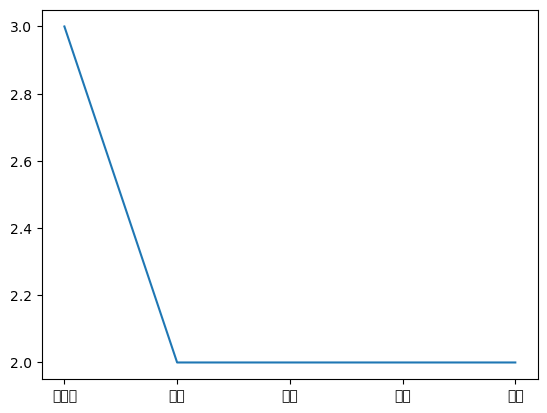

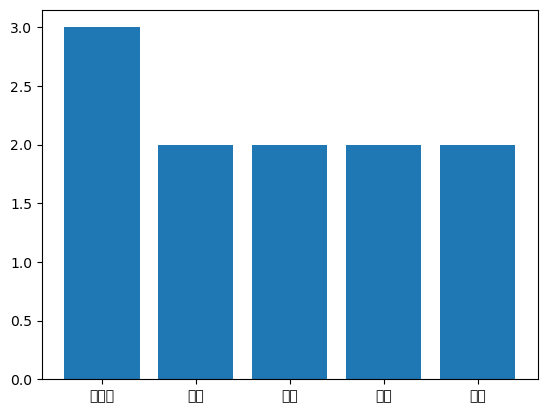

In [32]:
# 그래프 그려보기 ^^
# 그래프는 데이터 (x축) 결과값 (y축)으로 되어 있습니다.
# 그래서 단어와 빈도수를 쪼개서 별도의 데이터로 저장해야 합니다.

# 그래프의 x축은 키워드, y축은 키워드의 빈도수
words = []
counts = []

for word, count in top5_word:
    words.append(word)
    counts.append(count)

print(words, counts)

# 그래프 그리는 라이브러리 호출
import matplotlib.pyplot as plt

# 선그래프 그리기
plt.plot(words, counts)
plt.show()

# 막대그래프 그리기
plt.bar(words, counts)
plt.show()

In [10]:


# import requests
# from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# (내가 노가다 시) 업무 순서
# 1. 검색창에 가서 연도별로 '20xx년영화순위' 라고 입력한다
# 2. 스샷들이 보이면 마우스 우클릭 
# 3. 우클릭 하여 저장한 이미지 파일에 
#     연도와 순위로 파일 이름 지어주기

# 주기적으로 웹사이트 구조가 바뀌므로 크롤링은 같은 구조로 되지 않는다.
# 각 연도의 상위 5위 이므로 2중 for문을 생각해 낼 수 있다.
# 바깥 for문은 각 연도별 영화검색어
# 안쪽 for문은 1~5위 까지 5개의 영화 썸네일
# 문자열 데이터 처리의 응용도 2번 들어감 (url입력 & 썸네일 파일 이름짓기)


# 2015년부터 2019년까지의 각 연도에 대해 반복합니다.
for year in range(2020,2024):

# 해당 연도를 이용하여 다음(Daum) 검색 페이지의 URL을 생성합니다.
    url = "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84".format(year)

    # beautiful soup말고 selenium으로 라이브러리 교체
    # Selenium을 사용하여 웹사이트 창을 띄웁니다.
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    # 구글 크롬을 엽니다.  
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)
    #  selenium은 사용법이 살짝 다르다
    #  CSS_SELECTOR 기준, "thumb_img" 로 이미지 파일을 검색합니다. (사용법 차이)
    images = driver.find_elements(By.CSS_SELECTOR, "img.thumb_img")

    # for문을 사용해서 아까와 동일하게 파일 이름을 정합니다.
    for (idx, image) in enumerate(images):
        # 연도와 순위를 개별 이미지 파일에 저장합니다.
        screenshot_filename = "screenshot_{}_{}.png".format(year, idx + 1 )
        image.screenshot(screenshot_filename)
        print("이미지 파일 저장완료 :", screenshot_filename)
        
        # 상위 5개 이미지만 다운로드하고 반복을 종료합니다.
        if idx >= 4:
            break

이미지 파일 저장완료 : screenshot_2020_1.png
이미지 파일 저장완료 : screenshot_2020_2.png
이미지 파일 저장완료 : screenshot_2020_3.png
이미지 파일 저장완료 : screenshot_2020_4.png
이미지 파일 저장완료 : screenshot_2020_5.png
이미지 파일 저장완료 : screenshot_2021_1.png
이미지 파일 저장완료 : screenshot_2021_2.png
이미지 파일 저장완료 : screenshot_2021_3.png
이미지 파일 저장완료 : screenshot_2021_4.png
이미지 파일 저장완료 : screenshot_2021_5.png
이미지 파일 저장완료 : screenshot_2022_1.png
이미지 파일 저장완료 : screenshot_2022_2.png
이미지 파일 저장완료 : screenshot_2022_3.png
이미지 파일 저장완료 : screenshot_2022_4.png
이미지 파일 저장완료 : screenshot_2022_5.png
이미지 파일 저장완료 : screenshot_2023_1.png
이미지 파일 저장완료 : screenshot_2023_2.png
이미지 파일 저장완료 : screenshot_2023_3.png
이미지 파일 저장완료 : screenshot_2023_4.png
이미지 파일 저장완료 : screenshot_2023_5.png


In [12]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.keys import Keys

# 크롬 드라이버 경로 설정
chrome_path = "/path/to/chromedriver"  # 본인의 크롬 드라이버 경로로 변경

# 크롬 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

# Daum 검색 결과 페이지로 이동
url = "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=2017%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84"
driver.get(url)

# 이미지 썸네일 요소 찾기
thumbnails = driver.find_elements(By.CSS_SELECTOR, "img.thumb")

# 이미지 썸네일 URL 출력 또는 다운로드 등의 작업 수행
for thumbnail in thumbnails:
    thumbnail_url = thumbnail.get_attribute("src")
    print(thumbnail_url)

# 브라우저 닫기
driver.quit()
